In [2]:
"""
[ars599@ood-vn4:ar2 ] $ module use /g/data3/hh5/public/modules
[ars599@ood-vn4:ar2 ] $ 
[ars599@ood-vn4:ar2 ] $ module load conda/analysis3
[ars599@ood-vn4:ar2 ] $ pip install --user git+https://github.com/mabelcalim/waipy.git

waipy example
http://nicolasfauchereau.github.io/climatecode/posts/wavelet-analysis-in-python/
"""
import waipy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta # 

import os
os.getcwd()

%cd /home/599/ars599/Documents/cm2/

/home/599/ars599/Documents/cm2


In [13]:
import xarray as xr 
ds = xr.open_dataset('n34_output_demo2.nc')  # NetCDF or OPeNDAP URL
# Extract a dataset closest to specified point
n34 = ds.pot_temp
# select a variable to plot
ystr = 1950
yend = 2014
#n34_djf = n34.sel(time=slice(f'{ystr}-02-01',f'{yend}-12-01',12))

time = n34.time.dt.strftime("%Y %m")
yyyymmdd = n34.time.dt.year+(n34.time.dt.month-1)/12; #+n34.time.dt.day/365

In [14]:
import waipy

In [15]:
""" OPEN ARCHIVE .TXT/.DAT
    archive = file.txt
    dt      = data sampling
    date1   = data initial time"
    https://github.com/chris-torrence/wavelets/tree/main/wave_idl
"""
N =len(n34)      # the time series of length N.

dt = 1/12    # amount of time between each time series value, i.e. the sampling time.
            # seasonal data 1/4 year - 4 measures in 1 year

T1 = 1950.  # start time
# observation
#data,time = waipy.load_txt('sst_nino3.dat',dt,T1)
#print (len(data))

n34[np.isnan(n34)] = 0  # replace nan to zero
data_norm = waipy.normalize(n34).values

In [16]:
pad = 1         # pad the time series with zeroes (recommended)
dj = 1/12.       # this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 0.72     # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
dt = 1/12.

result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Nino3')
#waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)

Nr of Scales: 103
scales [0.16666666666666666, 0.17657718239321588, 0.18707700805156216, 0.19820118583378682, 0.20998684164914552, 0.22247330902833906, 0.23570226039551584, 0.2497178461461136, 0.2645668419946999, 0.2802988050845715, 0.2969662393801131, 0.3146247708938978, 0.3333333333333333, 0.35315436478643175, 0.37415401610312427, 0.39640237166757364, 0.41997368329829105, 0.444946618056678, 0.4714045207910317, 0.4994356922922272, 0.5291336839893998, 0.560597610169143, 0.5939324787602261, 0.6292495417877956, 0.6666666666666666, 0.7063087295728634, 0.7483080322062485, 0.7928047433351473, 0.839947366596582, 0.889893236113356, 0.9428090415820634, 0.9988713845844541, 1.0582673679787995, 1.121195220338286, 1.187864957520452, 1.2584990835755911, 1.3333333333333333, 1.4126174591457268, 1.496616064412497, 1.5856094866702946, 1.679894733193164, 1.779786472226712, 1.8856180831641267, 1.9977427691689083, 2.116534735957599, 2.242390440676572, 2.375729915040904, 2.5169981671511823, 2.6666666666666

{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <AxesSubplot:title={'center':'NINO3 Sea Surface Temperature (seasonal)'}, ylabel='Amplitude'>,
 'ax_cwt': <AxesSubplot:xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <AxesSubplot:title={'center':'$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <AxesSubplot:title={'center':'Global Wavelet Spectrum'}, xlabel='Power'>}

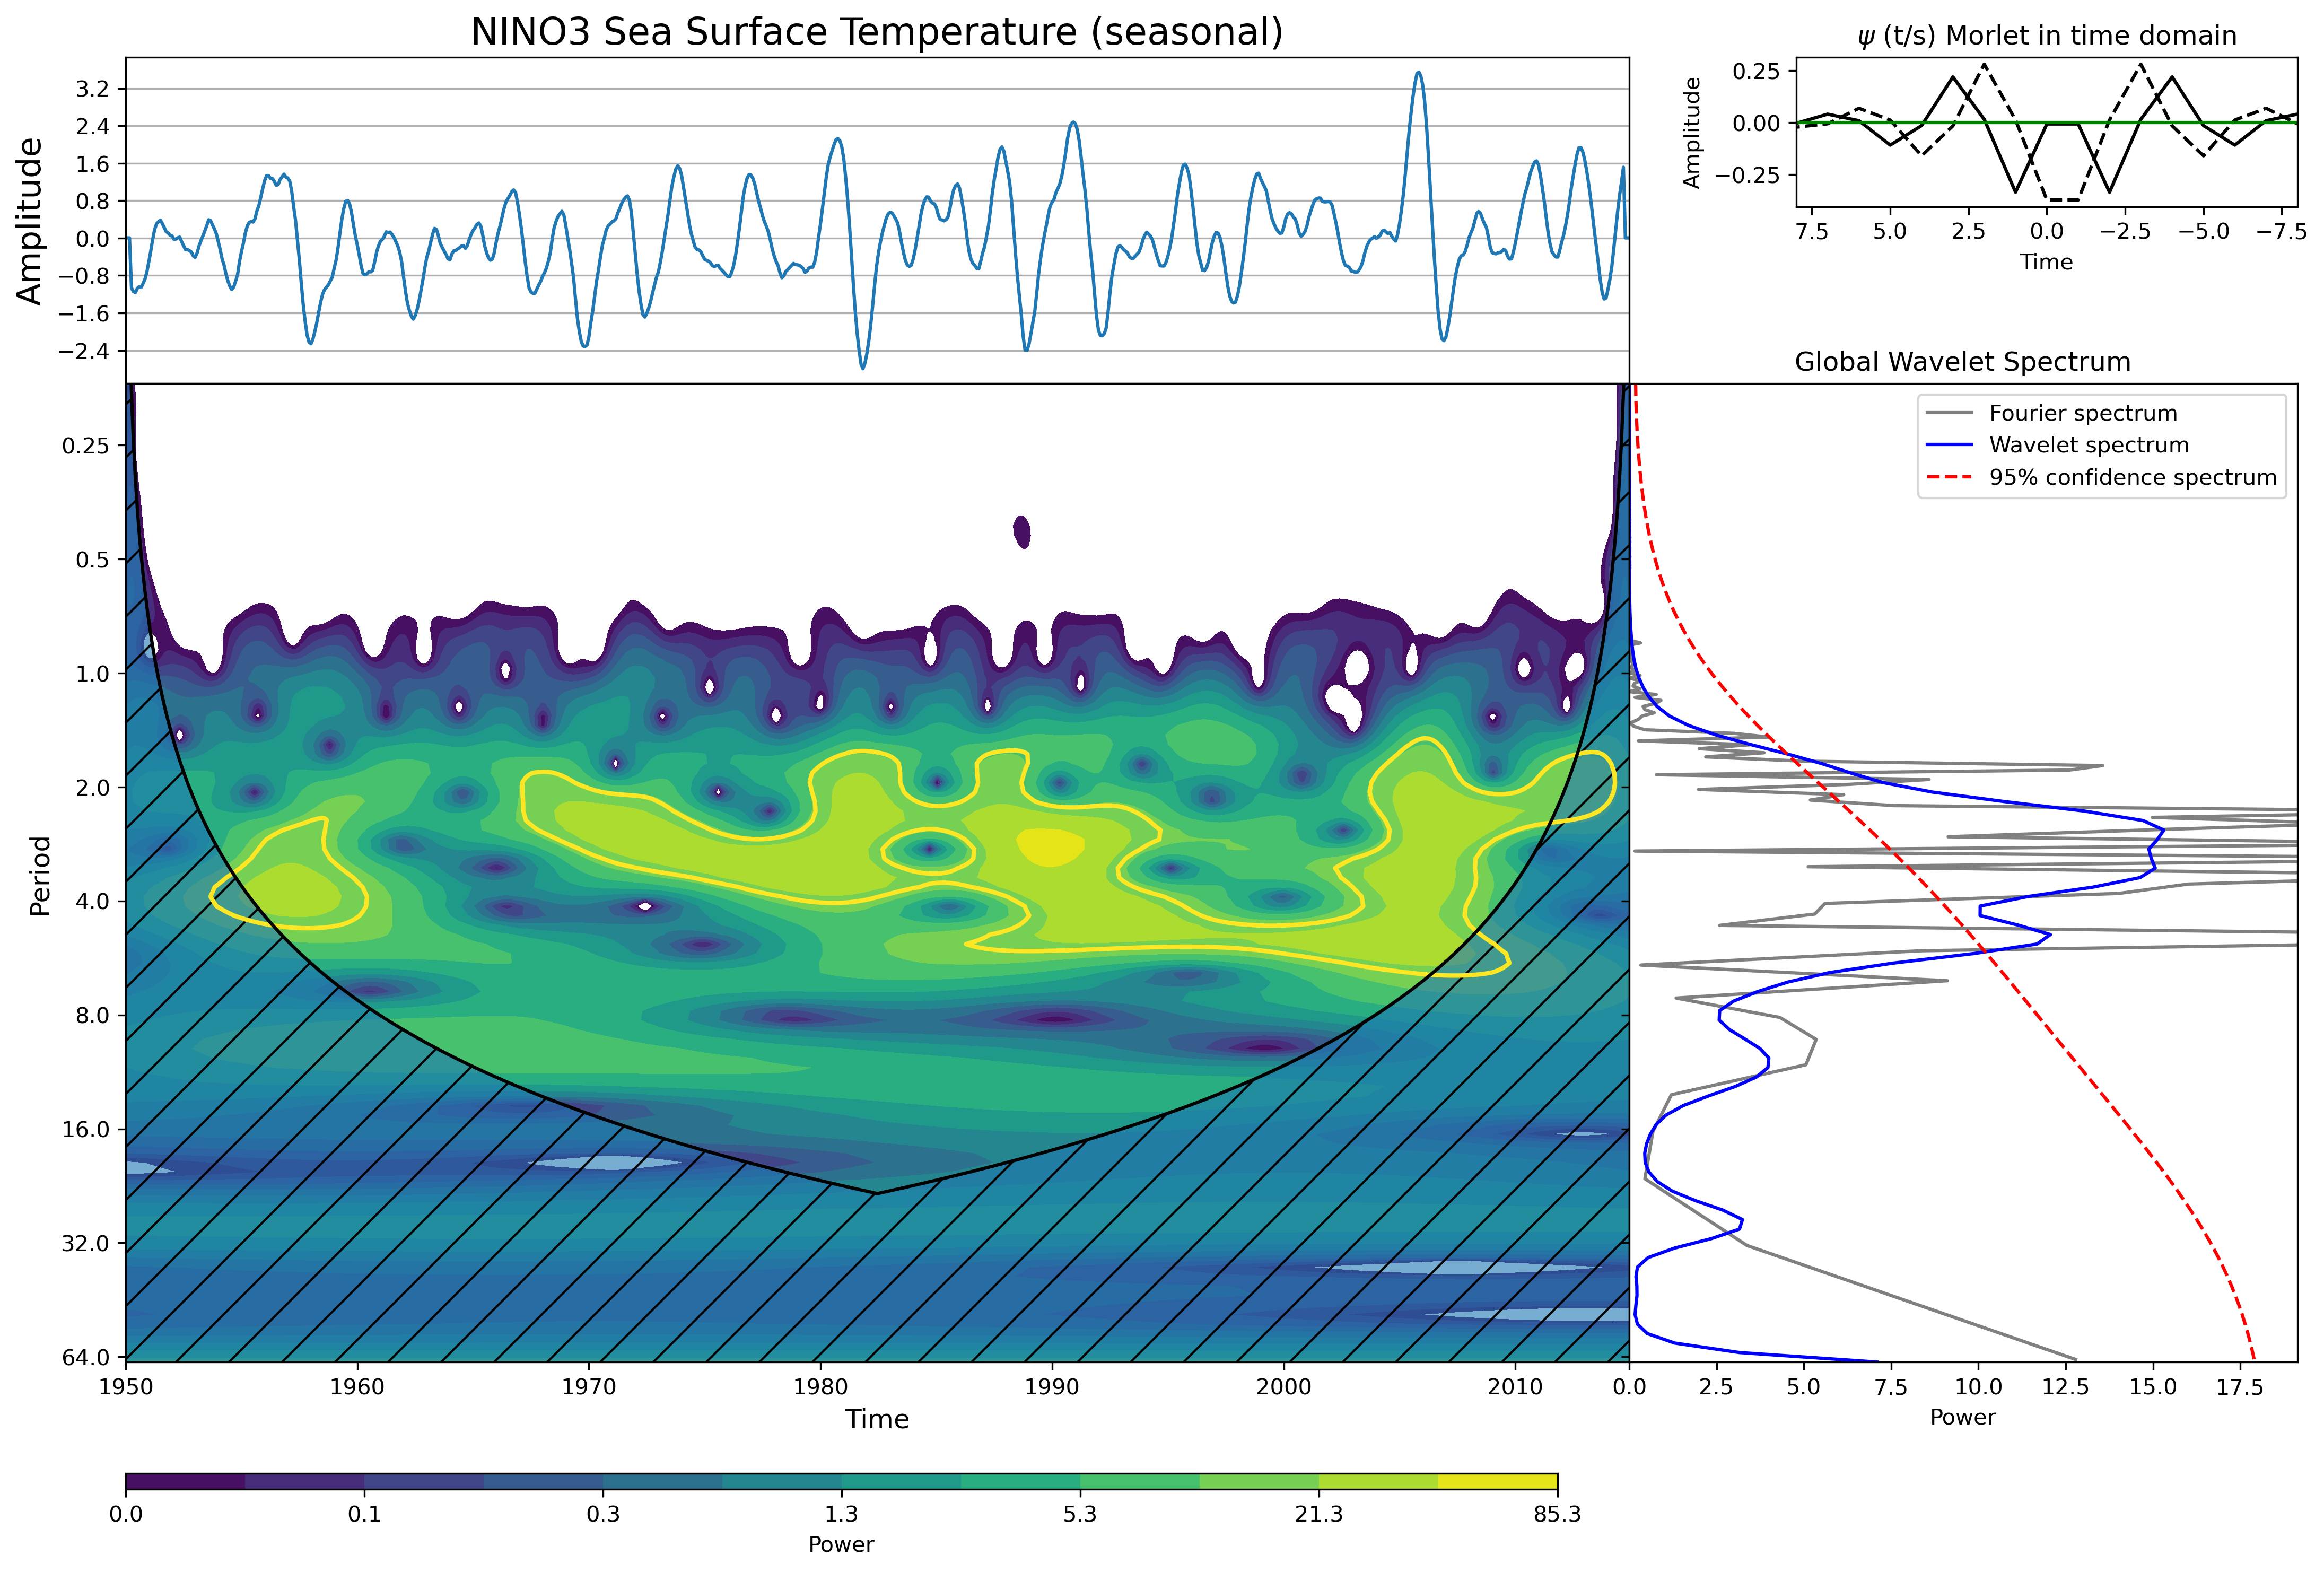

In [17]:
var='NINO3 Sea Surface Temperature (seasonal)'
#time from waipy.load_txt 
#data normalize
dtmin = dt/8    # dt/n of suboctaves
waipy.wavelet_plot(var, yyyymmdd, data_norm, dtmin, result)